In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn import preprocessing
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

In [2]:
!pip3 install xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [3]:
col_name_consistency = {
'Flow ID': 'Flow ID',
'Source IP': 'Source IP',
'Src IP':  'Source IP',
'Source Port': 'Source Port',
'Src Port': 'Source Port',
'Destination IP': 'Destination IP',
'Dst IP': 'Destination IP',
'Destination Port': 'Destination Port',
'Dst Port': 'Destination Port',
'Protocol': 'Protocol',
'Timestamp': 'Timestamp',
'Flow Duration': 'Flow Duration',
'Total Fwd Packets': 'Total Fwd Packets',
'Tot Fwd Pkts': 'Total Fwd Packets',
'Total Backward Packets': 'Total Backward Packets',
'Tot Bwd Pkts': 'Total Backward Packets',
'Total Length of Fwd Packets': 'Fwd Packets Length Total',
'TotLen Fwd Pkts': 'Fwd Packets Length Total',
'Total Length of Bwd Packets': 'Bwd Packets Length Total',
'TotLen Bwd Pkts': 'Bwd Packets Length Total',
'Fwd Packet Length Max': 'Fwd Packet Length Max',
'Fwd Pkt Len Max': 'Fwd Packet Length Max',
'Fwd Packet Length Min': 'Fwd Packet Length Min',
'Fwd Pkt Len Min': 'Fwd Packet Length Min',
'Fwd Packet Length Mean': 'Fwd Packet Length Mean',
'Fwd Pkt Len Mean': 'Fwd Packet Length Mean',
'Fwd Packet Length Std': 'Fwd Packet Length Std',
'Fwd Pkt Len Std': 'Fwd Packet Length Std',
'Bwd Packet Length Max': 'Bwd Packet Length Max',
'Bwd Pkt Len Max': 'Bwd Packet Length Max',
'Bwd Packet Length Min': 'Bwd Packet Length Min',
'Bwd Pkt Len Min': 'Bwd Packet Length Min',
'Bwd Packet Length Mean': 'Bwd Packet Length Mean',
'Bwd Pkt Len Mean': 'Bwd Packet Length Mean',
'Bwd Packet Length Std': 'Bwd Packet Length Std',
'Bwd Pkt Len Std': 'Bwd Packet Length Std',
'Flow Bytes/s': 'Flow Bytes/s',
'Flow Byts/s': 'Flow Bytes/s',
'Flow Packets/s': 'Flow Packets/s',
'Flow Pkts/s': 'Flow Packets/s',
'Flow IAT Mean': 'Flow IAT Mean',
'Flow IAT Std': 'Flow IAT Std',
'Flow IAT Max': 'Flow IAT Max',
'Flow IAT Min': 'Flow IAT Min',
'Fwd IAT Total': 'Fwd IAT Total',
'Fwd IAT Tot': 'Fwd IAT Total',
'Fwd IAT Mean': 'Fwd IAT Mean',
'Fwd IAT Std': 'Fwd IAT Std',
'Fwd IAT Max': 'Fwd IAT Max',
'Fwd IAT Min': 'Fwd IAT Min',
'Bwd IAT Total': 'Bwd IAT Total',
'Bwd IAT Tot': 'Bwd IAT Total',
'Bwd IAT Mean': 'Bwd IAT Mean',
'Bwd IAT Std': 'Bwd IAT Std',
'Bwd IAT Max': 'Bwd IAT Max',
'Bwd IAT Min': 'Bwd IAT Min',
'Fwd PSH Flags': 'Fwd PSH Flags',
'Bwd PSH Flags': 'Bwd PSH Flags',
'Fwd URG Flags': 'Fwd URG Flags',
'Bwd URG Flags': 'Bwd URG Flags',
'Fwd Header Length': 'Fwd Header Length',
'Fwd Header Len': 'Fwd Header Length',
'Bwd Header Length': 'Bwd Header Length',
'Bwd Header Len': 'Bwd Header Length',
'Fwd Packets/s': 'Fwd Packets/s',
'Fwd Pkts/s': 'Fwd Packets/s',
'Bwd Packets/s': 'Bwd Packets/s',
'Bwd Pkts/s': 'Bwd Packets/s',
'Min Packet Length': 'Packet Length Min',
'Pkt Len Min': 'Packet Length Min',
'Max Packet Length': 'Packet Length Max',
'Pkt Len Max': 'Packet Length Max',
'Packet Length Mean': 'Packet Length Mean',
'Pkt Len Mean': 'Packet Length Mean',
'Packet Length Std': 'Packet Length Std',
'Pkt Len Std': 'Packet Length Std',
'Packet Length Variance': 'Packet Length Variance',
'Pkt Len Var': 'Packet Length Variance',
'FIN Flag Count': 'FIN Flag Count',
'FIN Flag Cnt': 'FIN Flag Count',
'SYN Flag Count': 'SYN Flag Count',
'SYN Flag Cnt': 'SYN Flag Count',
'RST Flag Count': 'RST Flag Count',
'RST Flag Cnt': 'RST Flag Count',
'PSH Flag Count': 'PSH Flag Count',
'PSH Flag Cnt': 'PSH Flag Count',
'ACK Flag Count': 'ACK Flag Count',
'ACK Flag Cnt': 'ACK Flag Count',
'URG Flag Count': 'URG Flag Count',
'URG Flag Cnt': 'URG Flag Count',
'CWE Flag Count': 'CWE Flag Count',
'CWE Flag Cnt': 'CWE Flag Count',
'ECE Flag Count': 'ECE Flag Count',
'ECE Flag Cnt': 'ECE Flag Count',
'Down/Up Ratio': 'Down/Up Ratio',
'Average Packet Size': 'Avg Packet Size',
'Pkt Size Avg': 'Avg Packet Size',
'Avg Fwd Segment Size': 'Avg Fwd Segment Size',
'Fwd Seg Size Avg': 'Avg Fwd Segment Size',
'Avg Bwd Segment Size': 'Avg Bwd Segment Size',
'Bwd Seg Size Avg': 'Avg Bwd Segment Size',
'Fwd Avg Bytes/Bulk': 'Fwd Avg Bytes/Bulk',
'Fwd Byts/b Avg': 'Fwd Avg Bytes/Bulk',
'Fwd Avg Packets/Bulk': 'Fwd Avg Packets/Bulk',
'Fwd Pkts/b Avg': 'Fwd Avg Packets/Bulk',
'Fwd Avg Bulk Rate': 'Fwd Avg Bulk Rate',
'Fwd Blk Rate Avg': 'Fwd Avg Bulk Rate',
'Bwd Avg Bytes/Bulk': 'Bwd Avg Bytes/Bulk',
'Bwd Byts/b Avg': 'Bwd Avg Bytes/Bulk',
'Bwd Avg Packets/Bulk': 'Bwd Avg Packets/Bulk',
'Bwd Pkts/b Avg': 'Bwd Avg Packets/Bulk',
'Bwd Avg Bulk Rate': 'Bwd Avg Bulk Rate',
'Bwd Blk Rate Avg': 'Bwd Avg Bulk Rate',
'Subflow Fwd Packets': 'Subflow Fwd Packets',
'Subflow Fwd Pkts': 'Subflow Fwd Packets',
'Subflow Fwd Bytes': 'Subflow Fwd Bytes',
'Subflow Fwd Byts': 'Subflow Fwd Bytes',
'Subflow Bwd Packets': 'Subflow Bwd Packets',
'Subflow Bwd Pkts': 'Subflow Bwd Packets',
'Subflow Bwd Bytes': 'Subflow Bwd Bytes',
'Subflow Bwd Byts': 'Subflow Bwd Bytes',
'Init_Win_bytes_forward': 'Init Fwd Win Bytes',
'Init Fwd Win Byts': 'Init Fwd Win Bytes',
'Init_Win_bytes_backward': 'Init Bwd Win Bytes',
'Init Bwd Win Byts': 'Init Bwd Win Bytes',
'act_data_pkt_fwd': 'Fwd Act Data Packets',
'Fwd Act Data Pkts': 'Fwd Act Data Packets',
'min_seg_size_forward': 'Fwd Seg Size Min',
'Fwd Seg Size Min': 'Fwd Seg Size Min',
'Active Mean': 'Active Mean',
'Active Std': 'Active Std',
'Active Max': 'Active Max',
'Active Min': 'Active Min',
'Idle Mean': 'Idle Mean',
'Idle Std': 'Idle Std',
'Idle Max': 'Idle Max',
'Idle Min': 'Idle Min',
'Label': 'Label'
}

In [4]:
drop_columns = [ # this list includes all spellings across CIC NIDS datasets
    "Flow ID",    
    'Fwd Header Length.1',
    "Source IP", "Src IP",
    "Source Port", "Src Port",
    "Destination IP", "Dst IP",
    "Destination Port", "Dst Port",
    "Timestamp",
    "Unnamed: 0", "Inbound", "SimillarHTTP" # CIC-DDoS other undocumented columns
]

In [5]:
root_directory = '01-12'

# Get all directory names
dspaths = []
for dirname, _, filenames in os.walk(root_directory):
    for filename in filenames:
        if filename.endswith('.csv'):
            pds = os.path.join(dirname, filename)
            dspaths.append(pds)
            print(pds)


01-12/DrDoS_NTP.csv
01-12/Syn.csv
01-12/DrDoS_DNS.csv
01-12/TFTP.csv
01-12/UDPLag.csv
01-12/DrDoS_SSDP.csv
01-12/DrDoS_NetBIOS.csv
01-12/DrDoS_MSSQL.csv
01-12/DrDoS_UDP.csv
01-12/DrDoS_LDAP.csv
01-12/DrDoS_SNMP.csv


In [6]:
# Read all data files
df_list = [pd.read_csv(dsp, sep=',', encoding='utf-8') for dsp in dspaths]
[i.shape for i in df_list]

/var/folders/k7/24jm52n97r19bdzp5z6j0xzm0000gn/T/ipykernel_32550/1828111907.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(dsp, sep=',', encoding='utf-8') for dsp in dspaths]
/var/folders/k7/24jm52n97r19bdzp5z6j0xzm0000gn/T/ipykernel_32550/1828111907.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(dsp, sep=',', encoding='utf-8') for dsp in dspaths]
/var/folders/k7/24jm52n97r19bdzp5z6j0xzm0000gn/T/ipykernel_32550/1828111907.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(dsp, sep=',', encoding='utf-8') for dsp in dspaths]
/var/folders/k7/24jm52n97r19bdzp5z6j0xzm0000gn/T/ipykernel_32550/1828111907.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(dsp, sep=','

[(1217007, 88),
 (1582681, 88),
 (5074413, 88),
 (20107827, 88),
 (370605, 88),
 (2611374, 88),
 (4094986, 88),
 (4524498, 88),
 (3136802, 88),
 (2181542, 88),
 (5161377, 88)]

In [7]:
# Drop metadata, rename columns and more...
def preprocess_data(df):
    df.columns = df.columns.str.strip() # sometimes there's leading / trailing whitespace
    df.drop(columns=drop_columns, inplace=True, errors='ignore')    
    df.rename(columns=col_name_consistency, inplace=True)
    df['Label'].replace({'BENIGN': 'Benign'}, inplace=True)
    print(df.shape)

In [8]:
# Preprocess data for each data file
for df in df_list:
    preprocess_data(df)

(1217007, 78)
(1582681, 78)
(5074413, 78)
(20107827, 78)
(370605, 78)
(2611374, 78)
(4094986, 78)
(4524498, 78)
(3136802, 78)
(2181542, 78)
(5161377, 78)


In [9]:
# Downcast types for better memory management
def convert_types(df):
    # Convert integer columns
    for col in df.select_dtypes(include=['int']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    
    # Convert float columns
    for col in df.select_dtypes(include=['float']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')

    # Convert object columns to category where appropriate
    for col in df.select_dtypes(include=['object']).columns:
        if len(df[col].unique()) / len(df[col]) < 0.5:  # Arbitrary threshold
            df[col] = df[col].astype('category')

In [10]:
# Convert types for all data files
for df in df_list:
    convert_types(df)

In [11]:
# Function to handle NaN values
def handle_nan(df):
    # Handle NaN values
    print(df.isna().any(axis=1).sum(), "rows with at least one NaN to remove")
    df.replace([np.inf, -np.inf], np.nan, inplace=True) 
    df.dropna(inplace=True)

In [12]:
# Remove NaN files for all data files
for df in df_list:
    handle_nan(df)

31 rows with at least one NaN to remove
202277 rows with at least one NaN to remove
31 rows with at least one NaN to remove
10497 rows with at least one NaN to remove
36132 rows with at least one NaN to remove
2 rows with at least one NaN to remove
8 rows with at least one NaN to remove
14 rows with at least one NaN to remove
8 rows with at least one NaN to remove
12 rows with at least one NaN to remove
12 rows with at least one NaN to remove


In [13]:
# Print accquired shape
for df in df_list:
    print(df.shape)

(1209961, 78)
(1380364, 78)
(4912019, 78)
(19541066, 78)
(334202, 78)
(2569324, 78)
(3965133, 78)
(4398032, 78)
(3096129, 78)
(2142892, 78)
(5150754, 78)


In [14]:
# Removes all duplicates
def handle_duplicates(df):
    # Duplicates rows can lead to biased training and therefore can create over-optimistic
    # estimates of classification performance during testing
    print(df.duplicated().sum(), "fully duplicate rows to remove")
    print(df.shape)
    df.drop_duplicates(inplace=True)
    df.reset_index(inplace=True, drop=True)
    print(df.shape)

In [15]:
# Remove duplicates for all data files
for df in df_list:
    handle_duplicates(df)

83918 fully duplicate rows to remove
(1209961, 78)
(1126043, 78)
1224489 fully duplicate rows to remove
(1380364, 78)
(155875, 78)
4800865 fully duplicate rows to remove
(4912019, 78)
(111154, 78)
15121570 fully duplicate rows to remove
(19541066, 78)
(4419496, 78)
241260 fully duplicate rows to remove
(334202, 78)
(92942, 78)
1678301 fully duplicate rows to remove
(2569324, 78)
(891023, 78)
3945581 fully duplicate rows to remove
(3965133, 78)
(19552, 78)
4202815 fully duplicate rows to remove
(4398032, 78)
(195217, 78)
2019622 fully duplicate rows to remove
(3096129, 78)
(1076507, 78)
2112628 fully duplicate rows to remove
(2142892, 78)
(30264, 78)
5037386 fully duplicate rows to remove
(5150754, 78)
(113368, 78)


In [16]:
# Assuming 'df' is your DataFrame and 'label' is your target variable
le = LabelEncoder()

# Encode target label
for df in df_list:
    df['encoded_label'] = le.fit_transform(df['Label'])
    df.drop(['Label'], axis=1, inplace=True)

In [17]:
# Check dtypes
for df in df_list:
    print(df.dtypes)

Protocol                       int8
Flow Duration                 int32
Total Fwd Packets             int16
Total Backward Packets        int16
Fwd Packets Length Total    float32
                             ...   
Idle Mean                   float64
Idle Std                    float64
Idle Max                    float64
Idle Min                    float64
encoded_label                 int64
Length: 78, dtype: object
Protocol                       int8
Flow Duration                 int32
Total Fwd Packets             int16
Total Backward Packets        int16
Fwd Packets Length Total    float32
                             ...   
Idle Mean                   float64
Idle Std                    float64
Idle Max                    float64
Idle Min                    float64
encoded_label                 int64
Length: 78, dtype: object
Protocol                       int8
Flow Duration                 int32
Total Fwd Packets             int32
Total Backward Packets        int16
Fwd Packets 

In [18]:
# SVMs are sensitive to the scale of the data, so feature scaling is a crucial step.

scaler = StandardScaler()

def standard_scaler(df):
    # Convert all column names to strings
    df.columns = df.columns.astype(str)

    # Assuming 'df' is your feature matrix
    scaled_features = scaler.fit_transform(df)

    # Replace df with the scaled features (if you wish to keep it in a DataFrame format)
    df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

In [19]:
# Do scaling for all data files
for df in df_list:
    standard_scaler(df)

In [20]:
y_list = []

# Retrieve target labels from all data files
for df in df_list:
    y_list.append(df['encoded_label'])        

In [21]:
# Protocols for training
training_protocols = ['01-12/DrDoS_NTP.csv', '01-12/Syn.csv', '01-12/DrDoS_DNS.csv', '01-12/TFTP.csv', '01-12/UDPLag.csv']

# Protocols for testing
testing_protocols = ['01-12/DrDoS_SSDP.csv', '01-12/DrDoS_NetBIOS.csv', '01-12/DrDoS_MSSQL.csv', '01-12/DrDoS_UDP.csv', '01-12/DrDoS_LDAP.csv', '01-12/DrDoS_SNMP.csv']

training_dfs = []
testing_dfs = []

# Retrive training and testing protocols
for df, protocol_name in zip(df_list, dspaths):
    if protocol_name in training_protocols:
        training_dfs.append(df)
    elif protocol_name in testing_protocols:
        testing_dfs.append(df)

print(len(training_dfs))
print(len(testing_dfs))

5
6


In [22]:
# Combine multiple csv files to one csv file
combined_training_dfs = pd.concat(training_dfs, ignore_index=True)
combined_testing_dfs = pd.concat(testing_dfs, ignore_index=True)

In [23]:
# Apply Variance Threshold
selector = VarianceThreshold(threshold=0)

# Apply feature selection to df. Assumption: df is your features matrix
X_filtered = selector.fit_transform(combined_training_dfs)
    
# Convert the result back into a DataFrame
df_filtered = pd.DataFrame(X_filtered, columns=combined_training_dfs.columns[selector.get_support()])

In [24]:
# Calculate the absolute correlation of each feature with the target
correlation_threshold = 0.01 # This is an example threshhold

y_training = df_filtered['encoded_label']

corr_with_target = df_filtered.corrwith(y_training)

# Identify features with correlation below the threshold
low_corr_features = corr_with_target[corr_with_target < correlation_threshold].index

# Drop low correlation features
df_filtered.drop(low_corr_features, axis=1, inplace=True)

In [25]:
# Check accquired dataframe shape
for df in training_dfs:
    print(df.shape)

(1126043, 78)
(155875, 78)
(111154, 78)
(4419496, 78)
(92942, 78)


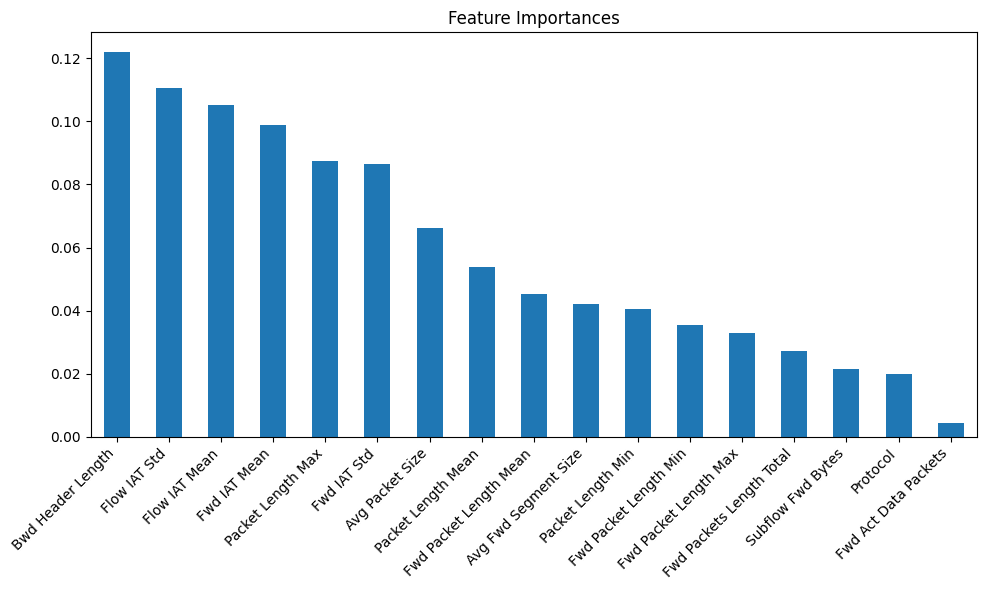

In [26]:
# Get most important features

df_features = df_filtered.drop('encoded_label', axis=1)

# Train a Random Forest classifier to get a feature importances
rf = RandomForestClassifier()
rf.fit(df_features, pd.concat(y_list[:5], ignore_index=True))

# Get feature importances
feature_importances = rf.feature_importances_

# Create a Series for easier plotting
importances_series = pd.Series(feature_importances, index=df_features.columns)

# Plot the most important features
importances_series_sorted = importances_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances_series_sorted.plot(kind='bar')
plt.title('Feature Importances')

# Rotate and align the tick labels so they look better
plt.xticks(rotation=45, ha="right")  # Tilt labels at a 45-degree angle for readability

# Ensure the layout is tight so everything fits without overlapping
plt.tight_layout()

plt.show()


In [27]:
# Check target label balance
y_counts = df_filtered['encoded_label'].value_counts()
print(f"Number of 0s: {y_counts.get(0, 0)}")  # The get method returns 0 if the key is not found
print(f"Number of 1s: {y_counts.get(1, 0)}")

Number of 0s: 43178
Number of 1s: 5861918


In [28]:
# Divided dataset into attacks vs non-attacks, and sample a
# balanced dataframe.

attack = df_filtered[df_filtered['encoded_label'] == 1]
non_attack = df_filtered[df_filtered['encoded_label'] == 0]

# Calculate sample size for 0.01% of the data
sample_size_per_class = int(0.5 * len(df) / 2)

# Sample each class
attack_sample = attack.sample(n=sample_size_per_class, random_state=42)
non_attack_sample = non_attack.sample(n=sample_size_per_class, random_state=42)

# Combine the samples to get a balanced dataset
balanced_df = pd.concat([attack_sample, non_attack_sample])

X = balanced_df.drop('encoded_label', axis=1)
y = balanced_df['encoded_label']

# Split the data into two sets: One for developing the model (80%) and one for final prediction (20%)
X_dev, X_final_pred, y_dev, y_final_pred = train_test_split(X, y, test_size=0.2, random_state=42)

y_counts = y_dev.value_counts()
print(f"Number of 0s: {y_counts.get(0, 0)}")  # The get method returns 0 if the key is not found
print(f"Number of 1s: {y_counts.get(1, 0)}")



Number of 0s: 18562
Number of 1s: 18614


In [29]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Apply k-fold cross-validation (k=5)
cv_scores = cross_val_score(rf, X_dev, y_dev, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Train the model on the entire development set
rf.fit(X_dev, y_dev)

# Predict on the final prediction set
final_predictions = rf.predict(X_final_pred)

# Evaluate the performance on the final prediction set
print("F1 score:", f1_score(y_final_pred, final_predictions, average='macro'))  # Use 'binary' if it's a binary classification
print("Final prediction accuracy:", accuracy_score(y_final_pred, final_predictions))

Cross-validation scores: [0.99811727 0.99838601 0.99677202 0.99838601 0.99771352]
Mean CV score: 0.9978749665832589
F1 score: 0.9986011917459174
Final prediction accuracy: 0.9986012481170647


In [30]:
# Retrieve desired features, this is a must since we need to apply
# the same data processing on our dataframes. One dataframe consist
# of seen protocols under training, and the other dataframe holds data
# that the model didn't see while training (other protocols).

desired_features = df_filtered.columns.tolist()
common_features = [feature for feature in desired_features if feature in combined_testing_dfs]
df2_filtered_testing = combined_testing_dfs[common_features]

In [31]:
# Predicting on unseen protocols with Random Forest model

X = df2_filtered_testing.drop('encoded_label', axis=1)
y = df2_filtered_testing['encoded_label']

final_predictions = rf.predict(X)

# F1-score 0.59% when unbalanced data set
# F1-score 0.84% when balanced data set

# Evaluate the performance on the final prediction set
print("F1 score:", f1_score(y, final_predictions, average='macro'))  # Use 'binary' if it's a binary classification
print("Final prediction accuracy:", accuracy_score(y, final_predictions))

F1 score: 0.846309210508079
Final prediction accuracy: 0.9966310264577926


In [32]:
# Accuracy seems to be much better with unbalanced dataset.

# Train the SVM
start_time = time.time()
svm_model = SVC(gamma='auto')

# Apply k-fold cross-validation
cv_scores = cross_val_score(svm_model, X_dev, y_dev, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

end_time = time.time()

svm_model.fit(X_dev, y_dev)

Cross-validation scores: [0.7534965  0.75171486 0.76328178 0.75574983 0.7596503 ]
Mean CV score: 0.7567786551041428


SVC(gamma='auto')

In [33]:
# Predict on the final prediction set with SVM
final_predictions = svm_model.predict(X_final_pred)

# Evaluate the performance on the final prediction set
print("F1 score:", f1_score(y_final_pred, final_predictions, average='macro'))  # Use 'binary' if it's a binary classification
print("Final prediction accuracy:", accuracy_score(y_final_pred, final_predictions))

F1 score: 0.7584082225601614
Final prediction accuracy: 0.7704970948999355


In [34]:
# Predicting on unseen protocols with SVM

X = df2_filtered_testing.drop('encoded_label', axis=1)
y = df2_filtered_testing['encoded_label']

final_predictions = svm_model.predict(X)

# Evaluate the performance on the final prediction set
print("F1 score:", f1_score(y, final_predictions, average='macro'))  # Use 'binary' if it's a binary classification
print("Final prediction accuracy:", accuracy_score(y, final_predictions))

F1 score: 0.7916755876431376
Final prediction accuracy: 0.9975691454303675


In [35]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', gamma=0.1)

# Apply k-fold cross-validation
cv_scores = cross_val_score(xgb_clf, X_dev, y_dev, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean score and 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

# Fit the classifier to the training data
xgb_clf.fit(X_dev, y_dev)

# Predict on testing set
final_predictions = xgb_clf.predict(X_final_pred)

# Calculate accuracy
# Evaluate the performance on the final prediction set
print("F1 score:", f1_score(y_final_pred, final_predictions, average='macro'))  # Use 'binary' if it's a binary classification
print("Final prediction accuracy:", accuracy_score(y_final_pred, final_predictions))

Cross-validation scores: [0.99744486 0.99798252 0.99623403 0.99852051 0.99784802]
Accuracy: 1.00 (+/- 0.00)
F1 score: 0.9987087975381851
Final prediction accuracy: 0.9987088444157521


In [36]:
# Predicting on unseen protocols with XGBoost

X = df2_filtered_testing.drop('encoded_label', axis=1)
y = df2_filtered_testing['encoded_label']

final_predictions = xgb_clf.predict(X)

# Evaluate the performance on the final prediction set
print("F1 score:", f1_score(y, final_predictions, average='macro'))  # Use 'binary' if it's a binary classification
print("Final prediction accuracy:", accuracy_score(y, final_predictions))

F1 score: 0.8331656156298582
Final prediction accuracy: 0.9961989414131374


In [37]:
dtrain = xgb.DMatrix(X_dev, label=y_dev)
params = {'objective':'binary:logistic', 'gamma':0.1}

# Perform cross-validation
cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="error", as_pandas=True)

print(cv_results)

    train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.004438         0.000174         0.005111        0.000786
1           0.004290         0.000515         0.004896        0.000933
2           0.004425         0.000169         0.004869        0.000971
3           0.003941         0.000325         0.004761        0.000984
4           0.003860         0.000295         0.004654        0.000834
5           0.003860         0.000274         0.004654        0.000723
6           0.003766         0.000390         0.004492        0.000660
7           0.003658         0.000295         0.004411        0.000805
8           0.003551         0.000183         0.004358        0.000760
9           0.003335         0.000083         0.004169        0.000956
10          0.002999         0.000169         0.003793        0.000971
11          0.002878         0.000083         0.003712        0.000971
12          0.002650         0.000076         0.003604        0.000729
13    

In [38]:
# Initialize the Decision Tree classifier
dt_clf = DecisionTreeClassifier()

# Apply k-fold cross-validation
cv_scores = cross_val_score(dt_clf, X_dev, y_dev, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Train the model
dt_clf.fit(X_dev, y_dev)

# Make predictions
final_predictions = dt_clf.predict(X_final_pred)

# Calculate accuracy
# Evaluate the performance on the final prediction set
print("F1 score:", f1_score(y_final_pred, final_predictions, average='macro'))  # Use 'binary' if it's a binary classification
print("Final prediction accuracy:", accuracy_score(y_final_pred, final_predictions))

Cross-validation scores: [0.9965035  0.99757902 0.99583053 0.99757902 0.99704102]
Mean CV score: 0.9969066172563146
F1 score: 0.9973100177612922
Final prediction accuracy: 0.9973100925328169


In [39]:
# Predicting on unseen protocols with Decision Tree model

X = df2_filtered_testing.drop('encoded_label', axis=1)
y = df2_filtered_testing['encoded_label']

final_predictions = dt_clf.predict(X)

# Evaluate the performance on the final prediction set
print("F1 score:", f1_score(y, final_predictions, average='macro'))  # Use 'binary' if it's a binary classification
print("Final prediction accuracy:", accuracy_score(y, final_predictions))

F1 score: 0.8489898641927796
Final prediction accuracy: 0.9967170135313558


In [40]:
# Hybrid predictions on seen protocols and unseen protocols
# Combines Decision Tree model and SVM model


sampled_df = df2_filtered_testing.sample(frac=0.05, random_state=42)

X_trained = X_final_pred
y_trained = y_final_pred

X_untrained = df2_filtered_testing.drop('encoded_label', axis=1)
y_untrained = df2_filtered_testing['encoded_label']

# trained = protocols seen, untrained = protocols unseen
svm_prediction_trained = svm_model.predict(X_trained)
svm_prediction_untrained = svm_model.predict(X_untrained)

dt_prediction_trained = dt_clf.predict(X_trained)
dt_prediction_untrained = dt_clf.predict(X_untrained)

# Combine predictions: For simplicity, we'll use majority voting
combined_predictions_trained = np.round((svm_prediction_trained + dt_prediction_trained) / 2).astype(int)
combined_predictions_untrained = np.round((svm_prediction_untrained + dt_prediction_untrained) / 2).astype(int)

# Calculate accuracy
accuracy_trained = accuracy_score(y_trained, combined_predictions_trained)
accuracy_untrained = accuracy_score(y_untrained, combined_predictions_untrained)
print(f"Accuracy: {accuracy_trained:.4f}")
print(f"Accuracy: {accuracy_untrained:.4f}")

# Calculate F1 score. The `average` parameter is crucial if you have a multi-class problem.
# For binary classification, you can use `average='binary'`. For multi-class, you might consider 'micro', 'macro', or 'weighted'.
f1_trained = f1_score(y_trained, combined_predictions_trained, average='binary')  # Adjust `average` as per your problem
f1_untrained = f1_score(y_untrained, combined_predictions_untrained, average='binary')  # Adjust `average` as per your problem
print(f"F1 Score: {f1_trained:.4f}")
print(f"F1 Score: {f1_untrained:.4f}")

Accuracy: 0.9976
Accuracy: 0.9967
F1 Score: 0.9976
F1 Score: 0.9983
